Question 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")

seasons = data.groupby('Season_End_Year')

results_charts = []
champions = {}
results_champion = []

<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_5832\1049640167.py:3: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")


In [2]:
for season, season_data in seasons:
    teams = {}
    for colum, row in season_data.iterrows():
        if row['Home'] not in teams:
            teams[row['Home']] = {'points' : 0, 'goals' : 0, 'win' : 0, 'draw' : 0, 'lose' : 0}
        if row['Away'] not in teams:
            teams[row['Away']] = {'points' : 0, 'goals' : 0, 'win' : 0, 'draw' : 0, 'lose' : 0}

        if row['FTR'] == 'H':
            teams[row['Home']]['points'] += 3
            teams[row['Home']]['win'] += 1
            teams[row['Away']]['lose'] += 1
            teams[row['Home']]['goals'] += row['HomeGoals']
            teams[row['Away']]['goals'] += row['AwayGoals']
            
        elif row['FTR'] == 'A':
            teams[row['Away']]['points'] += 3
            teams[row['Home']]['lose'] += 1
            teams[row['Away']]['win'] += 1
            teams[row['Home']]['goals'] += row['HomeGoals']
            teams[row['Away']]['goals'] += row['AwayGoals']
        else:
            teams[row['Home']]['points'] += 1
            teams[row['Away']]['points'] += 1
            teams[row['Home']]['draw'] += 1
            teams[row['Away']]['draw'] += 1
            teams[row['Home']]['goals'] += row['HomeGoals']
            teams[row['Away']]['goals'] += row['AwayGoals']
    for team, data in teams.items():
        results_charts.append({f'Season' : season, 'Team' : team, 'Points' : data['points'], 'Goals' : data['goals']})

    max_point = max(teams.items(), key=lambda x: x[1]['points'])
    champions[season] = max_point[0]

    results_champion.append({
        'Season' : season,
        'Champion' : max_point[0],
        'Points' : max_point[1]['points'],
        'Win' : max_point[1]['win'],
        'Draw' : max_point[1]['draw'],
        'Lose' : max_point[1]['lose']
    })

results_champion = pd.DataFrame(results_champion)
results_champion

,Season,Champion,Points,Win,Draw,Lose
0,2000,Manchester Utd,91,28,7,3
1,2001,Manchester Utd,80,24,8,6
2,2002,Arsenal,87,26,9,3
3,2003,Manchester Utd,83,25,8,5
4,2004,Arsenal,90,26,12,0
5,2005,Chelsea,95,29,8,1
6,2006,Chelsea,91,29,4,5
7,2007,Manchester Utd,89,28,5,5
8,2008,Manchester Utd,87,27,6,5
9,2009,Manchester Utd,90,28,6,4


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_8936\1079816584.py:1: SyntaxWarning: invalid escape sequence '\H'
  data_map = pd.read_excel('D:\H\TranCongHau_N22DCCI010\Python\Question 3\champion.xlsx')


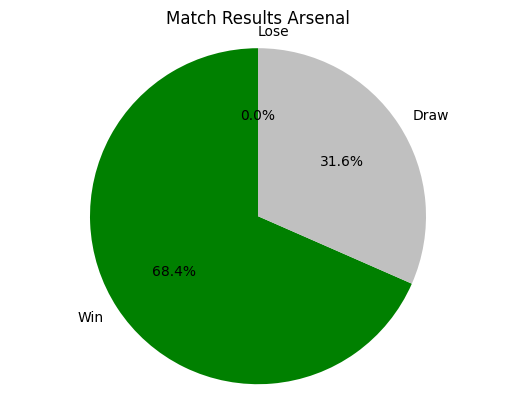

In [5]:
data_map = pd.read_excel('D:\H\TranCongHau_N22DCCI010\Python\Question 3\champion.xlsx')

check = data_map[data_map['Lose'] == 0]

label = ['Win', 'Draw', 'Lose']
size = [check['Win'].values[0],check['Draw'].values[0],check['Lose'].values[0]]
colors = ['green', 'silver', 'red']

fig1, ax1 = plt.subplots()
ax1.pie(size, labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Match Results Arsenal')
plt.show()